# USD to PKR Exchange Rate Prediction Using Yahoo Finance Data 

### In this project a range of machine learning algorithms are implemented in Python Jupyter Notebook to put forward an accurate model which can assist decision makers in making better and well calculated decisions using the predicted exchange rates. The five models used and accuracy metrics compared are Decision Tree Regressor, ANN, LSTM, SVM Regressor, Neural Network using different variations of layers and neurons.

The implementation is as follows:

### Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import seaborn as sns
from seaborn import regression
sns.set()

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import r2_score

from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model

from keras.layers import LSTM

from sklearn.svm import SVR


### Dataset: USD to PKR values (2013-2022) from Yahoo Finance

In [2]:
#Printing first few lines of dataset
data = pd.read_csv("PKRUSD1322.csv")
print(data.head())


         Date        Open        High         Low       Close   Adj Close  \
0  2013-08-12  101.389999  101.419998  101.389999  102.000000  102.000000   
1  2013-08-13  101.400002  102.699997  101.400002  101.389999  101.389999   
2  2013-08-14  101.300003  101.300003  101.300003  102.400002  102.400002   
3  2013-08-15  101.440002  102.550003  101.440002  102.550003  102.550003   
4  2013-08-16  101.599998  102.699997  101.599998  100.949997  100.949997   

   Volume  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  


### Data Formatting

In [3]:
# Removing null values
print("Sum of Null values before:" )
print(data.isna().sum())
data = data.replace('ND', np.nan)
data = data.dropna().reset_index(drop=True)
print("Sum of Null values after:" )
data.isna().sum()


Sum of Null values before:
Date         0
Open         4
High         4
Low          4
Close        4
Adj Close    4
Volume       4
dtype: int64
Sum of Null values after:


Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [4]:
#Removing Volume Column
data.drop('Volume', inplace=True, axis=1)
print(data)

            Date        Open        High         Low       Close   Adj Close
0     2013-08-12  101.389999  101.419998  101.389999  102.000000  102.000000
1     2013-08-13  101.400002  102.699997  101.400002  101.389999  101.389999
2     2013-08-14  101.300003  101.300003  101.300003  102.400002  102.400002
3     2013-08-15  101.440002  102.550003  101.440002  102.550003  102.550003
4     2013-08-16  101.599998  102.699997  101.599998  100.949997  100.949997
...          ...         ...         ...         ...         ...         ...
2339  2022-08-04  226.688019  226.688019  222.993088  228.399994  228.399994
2340  2022-08-05  221.802109  225.399994  221.802109  225.399994  225.399994
2341  2022-08-08  223.587662  225.399994  222.579376  223.208923  223.208923
2342  2022-08-09  222.725708  224.050003  222.725708  224.050003  224.050003
2343  2022-08-10  224.160004  224.160004  224.160004  224.160004  224.160004

[2344 rows x 6 columns]


In [5]:
#Removing previous index, Setting date as new index
data['Date'] = pd.to_datetime(data["Date"])
index = data.set_index(["Date"], drop=True)
index.head(5)

,Open,High,Low,Close,Adj Close
Date,,,,,
2013-08-12,101.389999,101.419998,101.389999,102.000000,102.000000
2013-08-13,101.400002,102.699997,101.400002,101.389999,101.389999
2013-08-14,101.300003,101.300003,101.300003,102.400002,102.400002
2013-08-15,101.440002,102.550003,101.440002,102.550003,102.550003
2013-08-16,101.599998,102.699997,101.599998,100.949997,100.949997


### Data Visualization

In [6]:
#Describe Dataset
data.describe()

,Open,High,Low,Close,Adj Close
count,2344.000000,2344.000000,2344.000000,2344.000000,2344.000000
mean,128.564356,129.631614,128.253916,129.146096,129.146096
std,30.612305,30.673148,30.534292,30.785648,30.785648
min,94.936996,95.357002,4.000000,2.000000,2.000000
25%,103.177500,104.300003,103.110001,103.419998,103.419998
50%,109.439999,110.705002,109.365002,110.449997,110.449997
75%,156.554436,157.949997,156.210708,157.117496,157.117496
max,238.079010,239.100006,237.036407,239.899994,239.899994


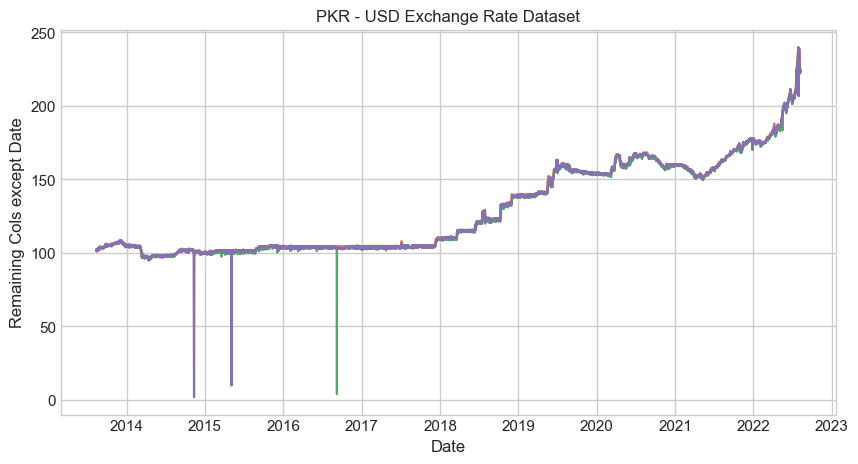

In [7]:
#Plotting all column data
datawithoutdate = data[['Open','High','Low','Close','Adj Close']]
plt.figure(figsize=(10, 5))
plt.style.use('seaborn-whitegrid')
plt.title("PKR - USD Exchange Rate Dataset")
plt.xlabel("Date")
plt.ylabel("Remaining Cols except Date")
plt.plot(data[['Date']],datawithoutdate)
#plt.figure(figsize=(5,10))

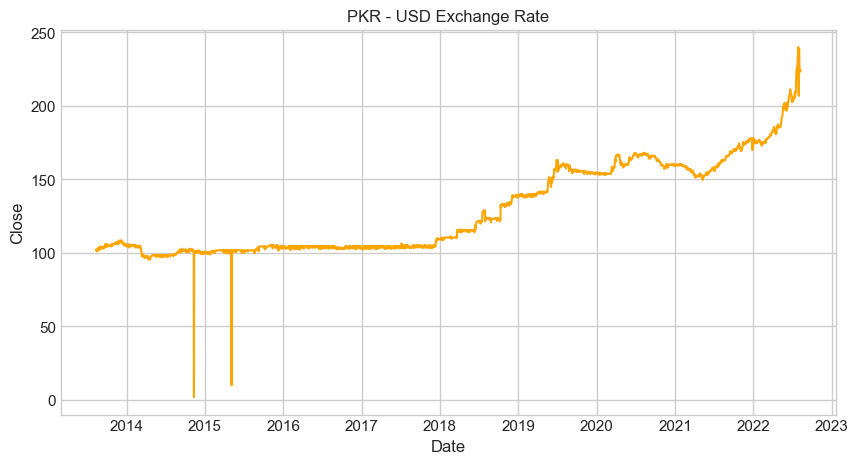

In [8]:
#Plotting only "Close" Column
plt.figure(figsize=(10, 5))
plt.title("PKR - USD Exchange Rate")
plt.xlabel("Date")
plt.ylabel("Close")
plt.plot(data["Date"],data["Close"], color="orange")
plt.show()

<AxesSubplot:title={'center':'Histogram Close Column'}, xlabel='"Close" Values', ylabel='Number of Times'>

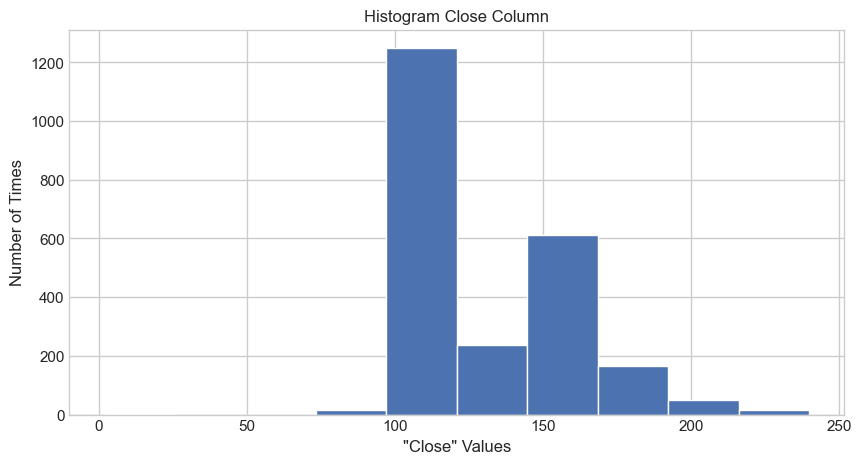

In [9]:
#Distribution of values in Close Column
#data["Close"].hist(color="blue")
fig = plt.figure(figsize = (10,5))
plt.title("Histogram Close Column")
plt.xlabel("\"Close\" Values")
plt.ylabel("Number of Times")
ax = fig.gca()
data["Close"].hist(ax = ax)

               Open      High       Low     Close  Adj Close
Open       1.000000  0.999611  0.997258  0.995271   0.995271
High       0.999611  1.000000  0.996925  0.995281   0.995281
Low        0.997258  0.996925  1.000000  0.992662   0.992662
Close      0.995271  0.995281  0.992662  1.000000   1.000000
Adj Close  0.995271  0.995281  0.992662  1.000000   1.000000


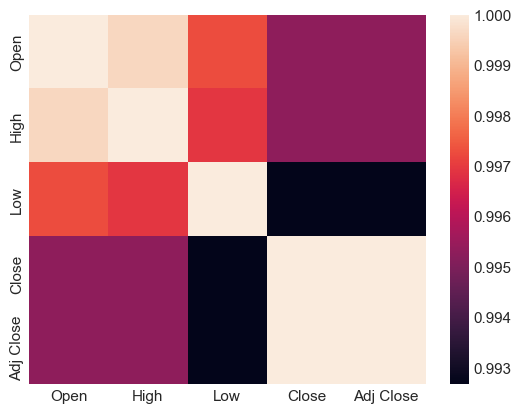

In [10]:
#Correlation between the features
print(data.corr())
sns.heatmap(data.corr())
plt.show()

### Dividing Data into Train & Test Sets

In [11]:
#Storing the most relevant features in the variable x and storing the target column in the variable y
x = data[["Open", "High", "Low"]]
y = data["Close"]
#AdjClose is a byproduct of Close
x = x.to_numpy()
y = y.to_numpy()
y = y.reshape(-1, 1)

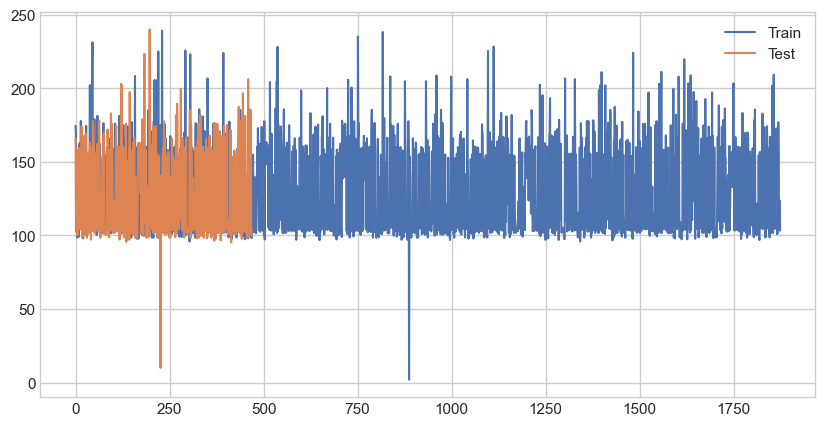

In [12]:
#Splitting Data into Train and Test Sets
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

plt.figure(figsize=(10,5))
plt.plot(ytrain)
plt.plot(ytest)
plt.legend(['Train', 'Test'])
plt.show()


### Applying Models to Data

### Model 1: Decision Tree Regressor

In [13]:
model = DecisionTreeRegressor()
model.fit(xtrain, ytrain)
ypred_dtr = model.predict(xtest)

In [14]:
# Predicting Close values for next 10 days
data = pd.DataFrame(data={"Predicted Rate": ypred_dtr.flatten()})
print(data.head(10))

   Predicted Rate
0      166.449997
1      102.669998
2      152.063187
3      102.540001
4      159.399994
5       99.345001
6      123.750000
7      105.250000
8      104.220001
9      138.500000


In [15]:
from sklearn.metrics import mean_squared_error, r2_score 
def reg_metrics(y_test, y_pred, X_train):
    
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    r2 = r2_score(y_test,y_pred)

    # Scikit-learn doesn't have adjusted r-square, hence custom code
    n = y_pred.shape[0]
    k = X_train.shape[1]
    adj_r_sq = 1 - (1 - r2)*(n-1)/(n-1-k)

    print("Root Mean Squared Error = ", rmse)
    print("R-Squared = ", r2)
    print("Adjusted R-Squared = ", adj_r_sq)

print()
print("Testing the model on Test Set")
reg_metrics(ytest, ypred_dtr, xtrain)
print()
ypred_dtr_train = model.predict(xtrain)
print("Testing the model on Training Set")
reg_metrics(ytrain, ypred_dtr_train, xtrain)
print()


Testing the model on Test Set
Root Mean Squared Error =  4.357658439993785
R-Squared =  0.9793324904568909
Adjusted R-Squared =  0.979199151685645

Testing the model on Training Set
Root Mean Squared Error =  0.07900573779477768
R-Squared =  0.9999934585495905
Adjusted R-Squared =  0.999993448060894



### Model 2: ANN - Artificial Neural Network

In [16]:
K.clear_session()

model_ann = Sequential()
model_ann.add(Dense(12, input_dim=3, activation='relu'))
model_ann.add(Dense(1))
model_ann.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)
history = model_ann.fit(xtrain, ytrain, epochs=20, batch_size=1, verbose=1, shuffle=False)

Epoch 1/20
1875/1875 [==============================] - 3s 1ms/step - loss: 170.4124
Epoch 2/20
1875/1875 [==============================] - 2s 1ms/step - loss: 9.4750
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 9.2221
Epoch 4/20
1875/1875 [==============================] - 2s 1ms/step - loss: 8.6565
Epoch 5/20
1875/1875 [==============================] - 2s 1ms/step - loss: 8.0809
Epoch 6/20
1875/1875 [==============================] - 2s 1ms/step - loss: 7.8975
Epoch 7/20
1875/1875 [==============================] - 3s 1ms/step - loss: 7.6936
Epoch 8/20
1875/1875 [==============================] - 3s 1ms/step - loss: 7.4477
Epoch 9/20
1875/1875 [==============================] - 3s 1ms/step - loss: 7.3749
Epoch 10/20
1875/1875 [==============================] - 3s 1ms/step - loss: 7.3644
Epoch 11/20
1875/1875 [==============================] - 3s 1ms/step - loss: 7.3206
Epoch 12/20
1875/1875 [==============================] - 3s 1ms/step - loss: 7.2785

In [17]:
y_pred_test_ann = model_ann.predict(xtest)
y_train_pred_ann = model_ann.predict(xtrain)
print()
print("Testing the model on Test Set")
reg_metrics(ytest, y_pred_test_ann, xtrain)
print()
print("Testing the model on Training Set")
reg_metrics(ytrain, y_train_pred_ann, xtrain)
print()
score_ann= model_ann.evaluate(xtest, ytest, batch_size=1)
print('ANN Scalar Test Loss: %f'%score_ann)

59/59 [==============================] - 0s 1ms/step

Testing the model on Test Set
Root Mean Squared Error =  4.3151552522821275
R-Squared =  0.9797336926458151
Adjusted R-Squared =  0.9796029422757881

Testing the model on Training Set
Root Mean Squared Error =  2.568035729807245
R-Squared =  0.9930887132703389
Adjusted R-Squared =  0.993077631570612

469/469 [==============================] - 1s 1ms/step - loss: 18.6206
ANN Scalar Test Loss: 18.620565


In [18]:
#Saving Model
model_ann.save('ANNCurrencyUSDPKR.h5')

In [19]:
#Saving Predicted outcomes for Test Values
y_pred_test_ANN = model_ann.predict(xtest)

15/15 [==============================] - 0s 1ms/step


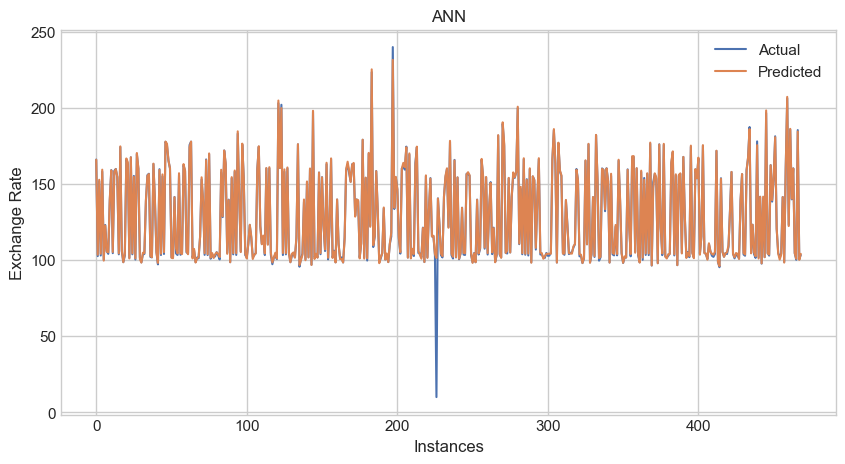

In [20]:
#Plotting Actual and Predicted values for test set
plt.figure(figsize=(10,5))
plt.plot(ytest, label='Actual')
plt.plot(y_pred_test_ANN, label='Predicted')
plt.title("ANN")
plt.xlabel('Instances')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

### Model 3: LSTM - Long Short-term Memory

In [21]:
#Reshaping X values according to LSTM Input
X_train = xtrain.reshape(xtrain.shape[0], 1, xtrain.shape[1])
X_test = xtest.reshape(xtest.shape[0], 1, xtest.shape[1])

In [22]:
#Preparing Model
K.clear_session()

model_lstm = Sequential()
model_lstm.add(LSTM(7,  activation='relu', kernel_initializer='lecun_uniform', return_sequences=False))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
history_model_lstm = model_lstm.fit(X_train, ytrain, epochs=20, batch_size=1, verbose=1, shuffle=False)


Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 17460.1543
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 16996.5176
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 16541.3262
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 16093.3750
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 15652.5342
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 15218.6543
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 14791.6826
Epoch 8/20
1875/1875 [==============================] - 3s 2ms/step - loss: 14371.6387
Epoch 9/20
1875/1875 [==============================] - 3s 2ms/step - loss: 13958.4951
Epoch 10/20
1875/1875 [==============================] - 3s 2ms/step - loss: 13552.2197
Epoch 11/20
1875/1875 [==============================] - 3s 2ms/step - loss: 13152.8809
Epoch 12/20
1875/1875 [==================

In [25]:
#Accuracy Metrics
y_pred_test_lstm = model_lstm.predict(X_test)
y_train_pred_lstm = model_lstm.predict(X_train)
print()
print("Testing the model on Test Set")
reg_metrics(ytest, y_pred_test_lstm, X_train)
print()
print("Testing the model on Training Set")
reg_metrics(ytrain, y_train_pred_lstm, X_train)
print()
score_lstm= model_lstm.evaluate(X_test, ytest, batch_size=1)
print('LSTM Scalar Test Loss: %f'%score_lstm)

59/59 [==============================] - 0s 2ms/step

Testing the model on Test Set
Root Mean Squared Error =  4.332432758347499
R-Squared =  0.9795710786885952
Adjusted R-Squared =  0.9795273336750804

Testing the model on Training Set
Root Mean Squared Error =  3.4653740619408957
R-Squared =  0.9874148896476027
Adjusted R-Squared =  0.9874081704215737

469/469 [==============================] - 1s 2ms/step - loss: 18.7700
LSTM Scalar Test Loss: 18.769966


In [26]:
#Saving Model
model_lstm.save('LSTMCurrencyUSDPKR.h5')

In [29]:
#Saving Predicted outcomes for Test Values
y_pred_test_LSTM = model_lstm.predict(X_test)

15/15 [==============================] - 0s 1ms/step


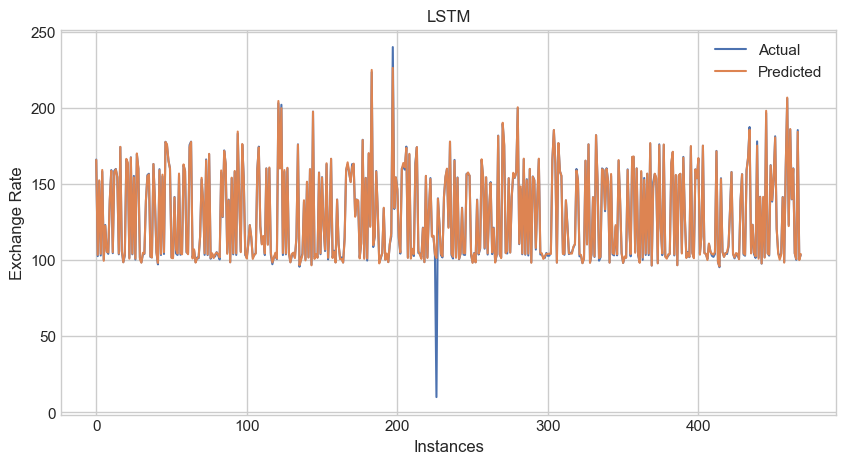

In [30]:
#Plotting Actual and Predicted values for test set
plt.figure(figsize=(10,5))
plt.plot(ytest, label='Actual')
plt.plot(y_pred_test_LSTM, label='Predicted')
plt.title("LSTM")
plt.xlabel('Instances')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

### Model 4: SVM Regressor - Support Vector Machine

In [31]:
#Initializing SVM Regressor
regressor = SVR(kernel='rbf')

In [32]:
# Training SVM on Train Data
regressor.fit(xtrain, ytrain)

C:\Users\uc\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [33]:
#Predicting Test Set Outcomes
y_pred_svm = regressor.predict(xtest)

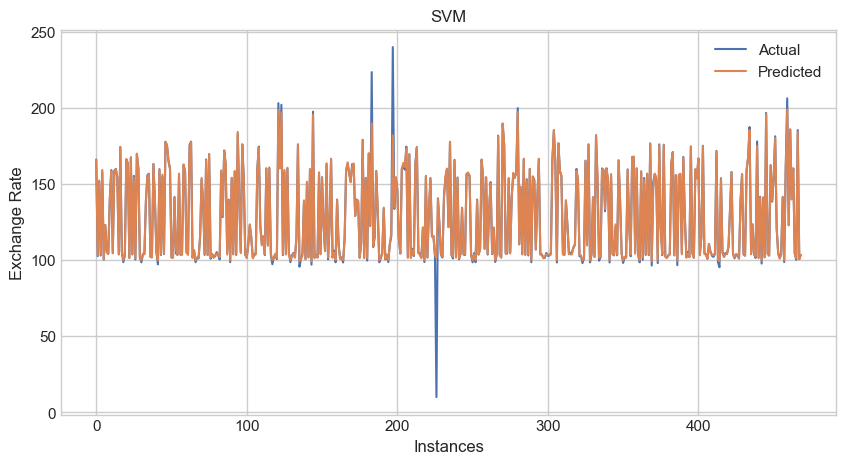

In [34]:
#Plotting Actual and Predicted values for test set
plt.figure(figsize=(10,5))
plt.style.use('seaborn-whitegrid')
plt.plot(ytest, label='Actual')
plt.plot(y_pred_svm, label='Predicted')
plt.title("SVM")
plt.xlabel('Instances')
plt.ylabel('Exchange Rate')
plt.legend()

In [35]:
#Accuracy Metrics
y_train_pred_svm = regressor.predict(xtrain)
print()
print("Testing the model on Test Set")
reg_metrics(ytest, y_pred_svm, xtrain)
print()
print("Testing the model on Training Set")
reg_metrics(ytrain, y_train_pred_svm, xtrain)
print()


Testing the model on Test Set
Root Mean Squared Error =  5.329496552568987
R-Squared =  0.9690860752866111
Adjusted R-Squared =  0.9688866306110409

Testing the model on Training Set
Root Mean Squared Error =  4.646774397598887
R-Squared =  0.9773712813425373
Adjusted R-Squared =  0.977334997988196



### Model 5: Neural Network using 2 Layers 50 Neurons

In [36]:
#Initializing NN
K.clear_session()
model = Sequential()
model.add(Dense(50, input_shape=(xtest.shape[1],), activation='relu', kernel_initializer='lecun_uniform'))
model.add(Dense(50, input_shape=(xtest.shape[1],), activation='relu'))
model.add(Dense(1))
model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')
model.fit(xtrain, ytrain, batch_size=16, epochs=20, verbose=1)

Epoch 1/20


C:\Users\uc\AppData\Roaming\Python\Python310\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


118/118 [==============================] - 1s 2ms/step - loss: 1176.0721
Epoch 2/20
118/118 [==============================] - 0s 2ms/step - loss: 6.7518
Epoch 3/20
118/118 [==============================] - 0s 2ms/step - loss: 6.5948
Epoch 4/20
118/118 [==============================] - 0s 2ms/step - loss: 6.7072
Epoch 5/20
118/118 [==============================] - 0s 2ms/step - loss: 6.7518
Epoch 6/20
118/118 [==============================] - 0s 2ms/step - loss: 6.7157
Epoch 7/20
118/118 [==============================] - 0s 2ms/step - loss: 6.7803
Epoch 8/20
118/118 [==============================] - 0s 2ms/step - loss: 6.8407
Epoch 9/20
118/118 [==============================] - 0s 2ms/step - loss: 6.9086
Epoch 10/20
118/118 [==============================] - 0s 2ms/step - loss: 6.8484
Epoch 11/20
118/118 [==============================] - 0s 2ms/step - loss: 6.8096
Epoch 12/20
118/118 [==============================] - 0s 2ms/step - loss: 6.7112
Epoch 13/20
118/118 [============

In [37]:
#Saving Predicted values for Test Set
y_pred_nn = model.predict(xtest)

15/15 [==============================] - 0s 1ms/step


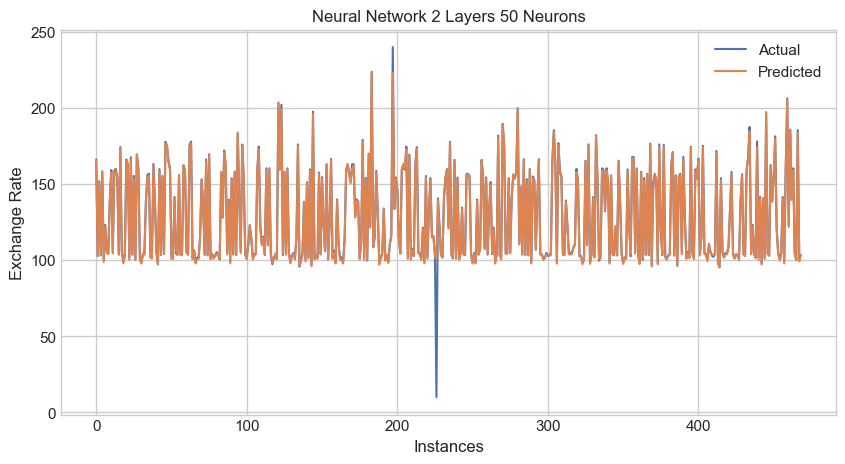

In [38]:
#Plotting Actual and Predicted values for test set
plt.figure(figsize=(10,5))
plt.plot(ytest, label='Actual')
plt.plot(y_pred_nn, label='Predicted')
plt.title("Neural Network 2 Layers 50 Neurons")
plt.xlabel('Instances')
plt.ylabel('Exchange Rate')
plt.legend()


In [39]:
#Accuracy Metrics
y_train_pred_nn = model.predict(xtrain)
print()
print("Testing the model on Test Set")
reg_metrics(ytest, y_pred_nn, xtrain)
print()
print("Testing the model on Training Set")
reg_metrics(ytrain, y_train_pred_nn, xtrain)
print()
score_nn= model.evaluate(xtest, ytest, batch_size=1)
print('NN Scalar Test Loss: %f'%score_nn)

59/59 [==============================] - 0s 1ms/step

Testing the model on Test Set
Root Mean Squared Error =  4.369731185042316
R-Squared =  0.979217814554044
Adjusted R-Squared =  0.9790837359382636

Testing the model on Training Set
Root Mean Squared Error =  2.5877133124800973
R-Squared =  0.9929823919643308
Adjusted R-Squared =  0.9929711397868284

469/469 [==============================] - 1s 1ms/step - loss: 19.0946
NN Scalar Test Loss: 19.094568
